In [1]:
import numpy as np
import matplotlib.pyplot as plt

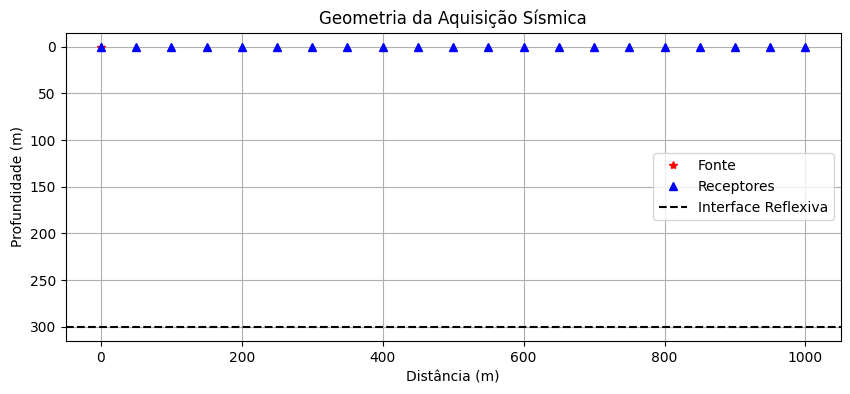

In [2]:
# Geometria da aquisição

# Fonte no centro
fonte_x = 0
fonte_z = 0

# Receptores ao longo da superfície
n_receptores = 21
x_receptores = np.linspace(0, 1000, n_receptores)
z_receptores = np.zeros_like(x_receptores)

# Interface de reflexão base (usada apenas para visualização)
profundidade_reflexao = 300

plt.figure(figsize=(10, 4))
plt.plot(fonte_x, fonte_z, 'r*', label='Fonte')
plt.plot(x_receptores, z_receptores, 'b^', label='Receptores')
plt.axhline(y=profundidade_reflexao, color='k', linestyle='--', label='Interface Reflexiva')
plt.gca().invert_yaxis()
plt.xlabel('Distância (m)')
plt.ylabel('Profundidade (m)')
plt.legend()
plt.title('Geometria da Aquisição Sísmica')
plt.grid(True)
plt.show()


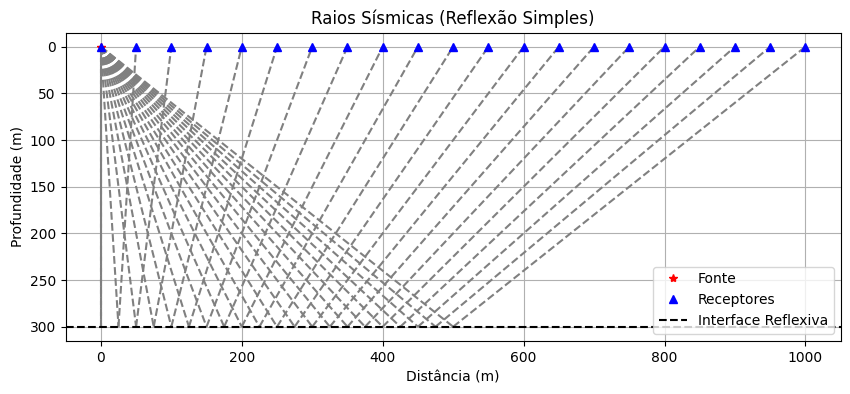

In [3]:
# Tragetórias dos Raios

plt.figure(figsize=(10, 4))
for xr in x_receptores:
    ponto_reflexao_x = (xr + fonte_x) / 2
    ponto_reflexao_z = profundidade_reflexao
    plt.plot([fonte_x, ponto_reflexao_x], [fonte_z, ponto_reflexao_z], 'gray', linestyle='--')
    plt.plot([ponto_reflexao_x, xr], [ponto_reflexao_z, 0], 'gray', linestyle='--')

plt.plot(fonte_x, fonte_z, 'r*', label='Fonte')
plt.plot(x_receptores, z_receptores, 'b^', label='Receptores')
plt.axhline(y=profundidade_reflexao, color='k', linestyle='--', label='Interface Reflexiva')
plt.gca().invert_yaxis()
plt.xlabel('Distância (m)')
plt.ylabel('Profundidade (m)')
plt.title('Raios Sísmicas (Reflexão Simples)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Tempo e amostragem
tmax = 1.0  # segundos
dt = 0.002  # intervalo de amostragem (s)
nt = int(tmax / dt)
tempo = np.linspace(0, tmax, nt)

# Pulso de Ricker
f0 = 25  # Hz
t0 = 0.1
ricker = lambda t: (1 - 2*(np.pi*f0*(t - t0))**2) * np.exp(-(np.pi*f0*(t - t0))**2)
pulso = ricker(tempo[:100])

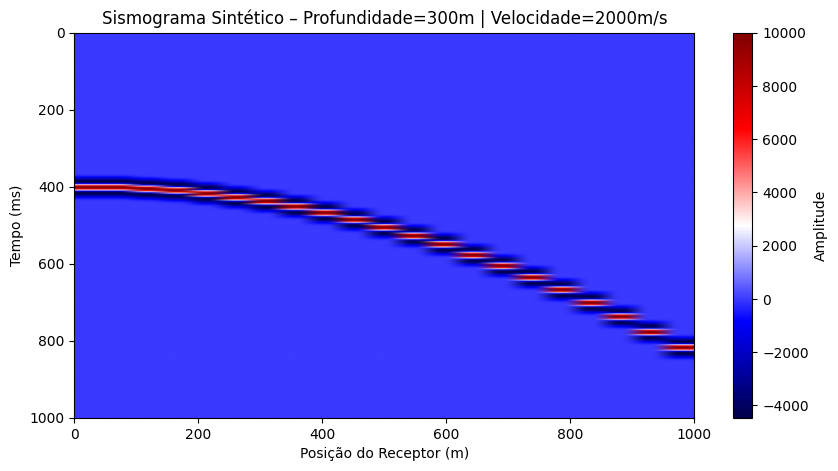

Arquivo sismograma_1.sgy exportado com profundidade=300m e velocidade=2000m/s.
Tempos de Viagem (s): [np.float64(0.3), np.float64(0.30104166666666665), np.float64(0.30416666666666664), np.float64(0.309375), np.float64(0.31666666666666665), np.float64(0.3260416666666667), np.float64(0.33749999999999997), np.float64(0.35104166666666664), np.float64(0.36666666666666664), np.float64(0.384375), np.float64(0.4041666666666667), np.float64(0.42604166666666665), np.float64(0.44999999999999996), np.float64(0.4760416666666667), np.float64(0.5041666666666667), np.float64(0.534375), np.float64(0.5666666666666667), np.float64(0.6010416666666667), np.float64(0.6375), np.float64(0.6760416666666667), np.float64(0.7166666666666667)]


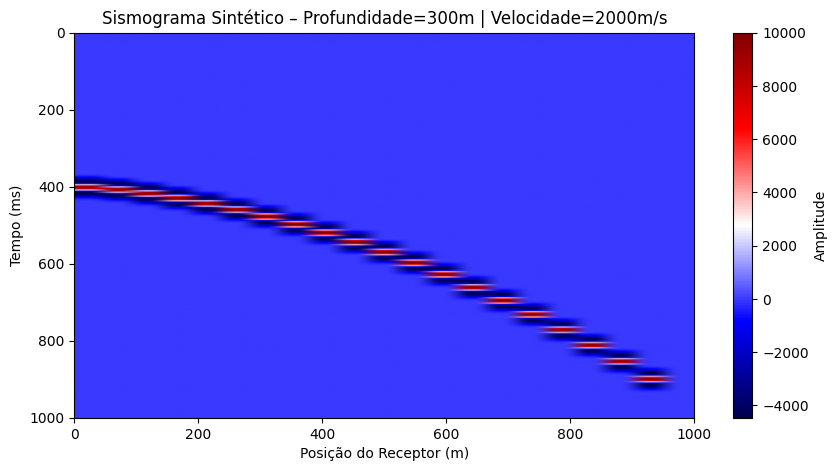

Arquivo sismograma_2.sgy exportado com profundidade=300m e velocidade=2000m/s.
Tempos de Viagem (s): [np.float64(0.3), np.float64(0.30751214279422967), np.float64(0.3171076189217927), np.float64(0.32878642838268907), np.float64(0.3425485711769187), np.float64(0.35839404730448177), np.float64(0.37632285676537813), np.float64(0.39633499955960777), np.float64(0.4184304756871708), np.float64(0.4426092851480672), np.float64(0.46887142794229686), np.float64(0.49721690406985986), np.float64(0.5276457135307562), np.float64(0.5601578563249858), np.float64(0.5947533324525489), np.float64(0.6314321419134452), np.float64(0.670194284707675), np.float64(0.7110397608352379), np.float64(0.7539685702961343), np.float64(0.798980713090364), np.float64(0.8460761892179272)]


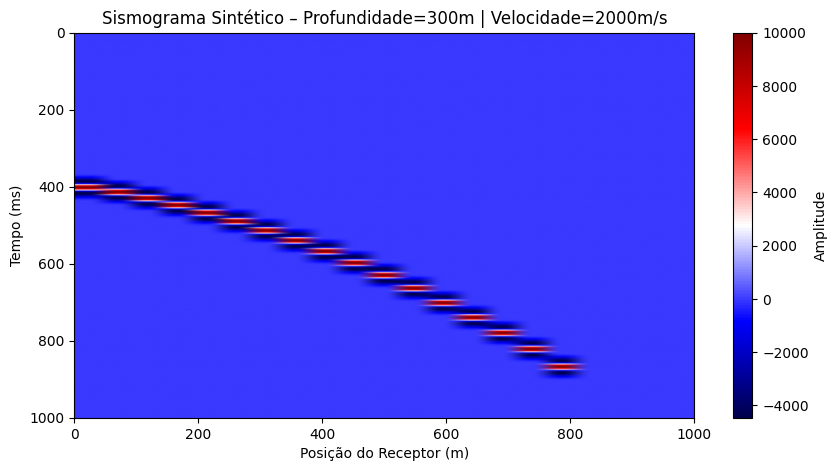

Arquivo sismograma_3.sgy exportado com profundidade=300m e velocidade=2000m/s.
Tempos de Viagem (s): [np.float64(0.3), np.float64(0.31354166666666666), np.float64(0.32916666666666666), np.float64(0.346875), np.float64(0.36666666666666664), np.float64(0.3885416666666667), np.float64(0.4125), np.float64(0.43854166666666666), np.float64(0.4666666666666667), np.float64(0.49687499999999996), np.float64(0.5291666666666667), np.float64(0.5635416666666666), np.float64(0.6), np.float64(0.6385416666666667), np.float64(0.6791666666666667), np.float64(0.721875), np.float64(0.7666666666666666), np.float64(0.8135416666666666), np.float64(0.8625), np.float64(0.9135416666666667), np.float64(0.9666666666666666)]


In [5]:
from obspy.io.segy.segy import SEGYTraceHeader, SEGYBinaryFileHeader
from obspy.core import Trace, Stream
import os

# Lista de modelos com diferentes profundidades e velocidades
modelos = [
    {"profundidade": 300, "velocidade": 2000, "angulo": 0},   # Horizontal
    {"profundidade": 300, "velocidade": 2000, "angulo": 15},  # Inclinado leve
    {"profundidade": 300, "velocidade": 2000, "angulo": 30},  # Inclinado forte
]


# Geração dos sismogramas
for i, modelo in enumerate(modelos, start=1):
    profundidade = modelo["profundidade"]
    velocidade = modelo["velocidade"]

    # Calcular tempos de viagem
    tempos_viagem = []
    for xr in x_receptores:
        dx = xr - fonte_x
        T0 = 2 * profundidade / velocidade
        seno = np.sin(np.radians(modelo.get("angulo", 0)))
        t = T0 + (dx**2 + 4 * dx * profundidade * seno) / (2 * (velocidade**2) * T0)
        tempos_viagem.append(t)

    # Gerar sismograma sintético
    sismograma = np.zeros((n_receptores, nt))
    for j, t0_r in enumerate(tempos_viagem):
        idx = int(t0_r / dt)
        if idx + len(pulso) < nt:
            sismograma[j, idx:idx+len(pulso)] += pulso * 1e4
    sismograma /= np.max(np.abs(sismograma)) * 1e-4  # normalização

    # Visualizar o sismograma
    plt.figure(figsize=(10, 5))
    plt.imshow(sismograma.T, aspect='auto', cmap='seismic',
               extent=[x_receptores[0], x_receptores[-1], tmax*1000, 0])
    plt.xlabel('Posição do Receptor (m)')
    plt.ylabel('Tempo (ms)')
    plt.title(f'Sismograma Sintético – Profundidade={profundidade}m | Velocidade={velocidade}m/s')
    plt.colorbar(label='Amplitude')
    plt.grid(False)
    plt.show()

    # Criar traces SEG-Y
    traces = []
    for k in range(n_receptores):
        trace_data = sismograma[k, :].astype(np.float32)
        trace_header = SEGYTraceHeader()
        trace_header.trace_sequence_number_within_line = k + 1
        trace_header.trace_number_within_segy_file = k + 1
        trace_header.receiver_group_coordinate_x = int(x_receptores[k])
        trace_header.source_coordinate_x = int(fonte_x)
        trace_header.sample_interval_in_ms_for_this_trace = int(dt * 1e6)
        trace_header.number_of_samples_in_this_trace = nt
        trace_header.distance_from_center_of_source_to_receiver_group = int(abs(x_receptores[k] - fonte_x))

        tr = Trace(data=trace_data)
        tr.stats.delta = dt
        tr.stats.segy = {'trace_header': trace_header}
        traces.append(tr)

    # Criar stream e cabeçalho binário
    stream = Stream(traces=traces)
    binary_header = SEGYBinaryFileHeader()
    binary_header.sample_interval = int(dt * 1e6)
    binary_header.number_of_samples_per_data_trace = nt
    binary_header.data_sample_format_code = 5  # IEEE float

    # Salvar arquivo SEG-Y
    nome_arquivo = f"sismograma_{i}.sgy"
    stream.write(nome_arquivo, format="SEGY", data_encoding=5, byteorder='>', segy_bfile_header=binary_header)
    print(f"Arquivo {nome_arquivo} exportado com profundidade={profundidade}m e velocidade={velocidade}m/s.")
    print("Tempos de Viagem (s):", tempos_viagem)